# Time series

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import signal
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from pathlib import Path

import os, sys
sys.path.insert(0, os.path.abspath('../src'))

from ts import *
from utils import *

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, _, _, _ = load_data(data_path)

## Exploration TS: infected Firenze

In [5]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

In [6]:
tmp_df = covidpro_df[covidpro_df.Province == province]

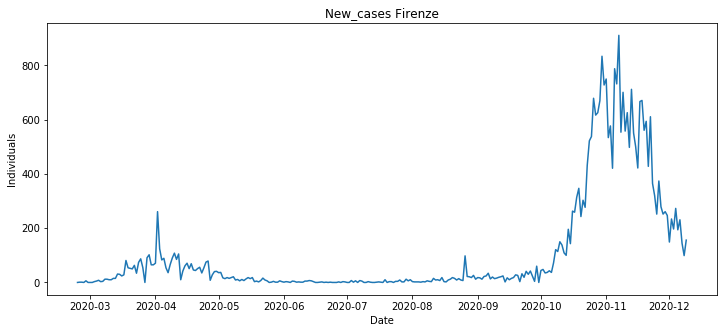

In [7]:
visualize_ts(tmp_df, date, compart, province)

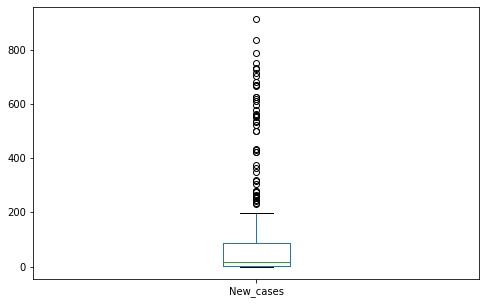

In [8]:
show_boxplot(tmp_df, compart)

In [9]:
tmp_df = tmp_df.set_index(date)

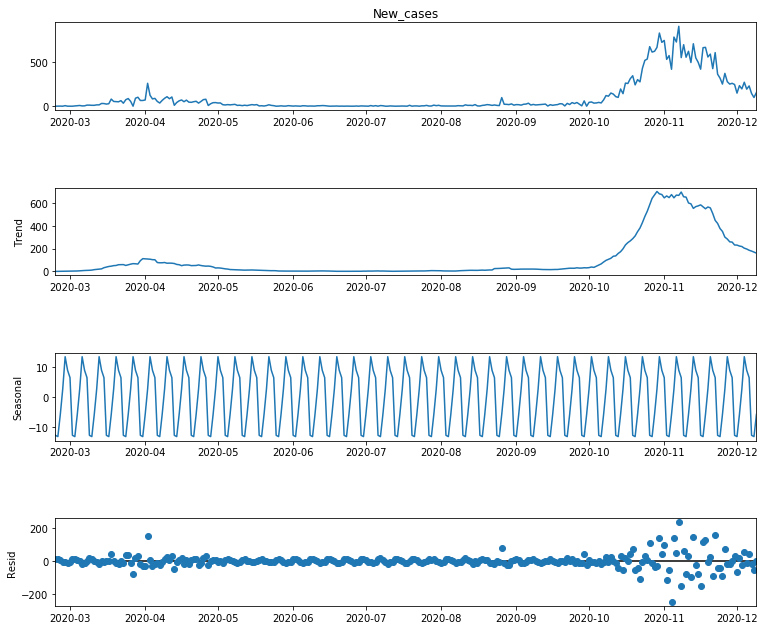

In [10]:
# Additive Decomposition
plot_decomposition(tmp_df, compart)

In [11]:
# Test for stationarity
adf_test(tmp_df[compart].values)

ADF Statistic: -2.9758023534900544
p-value: 0.03721678379146367
Critial Values:
   1%, -3.4544435065994437
Critial Values:
   5%, -2.8721468827772774
Critial Values:
   10%, -2.572422013959188


In [12]:
# Test for trend stationarity
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.758027
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


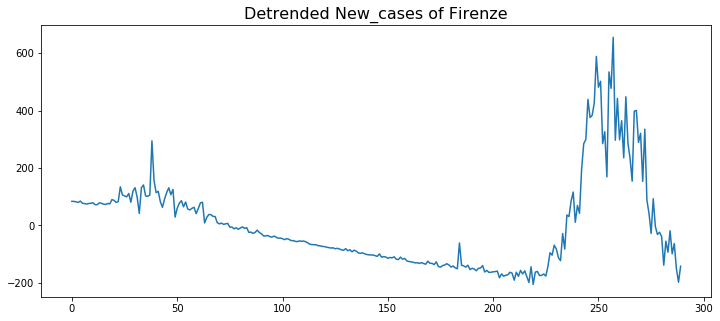

In [13]:
# Detrend by subtracting best leastsq fit
plot_detrended_deseason(
    signal.detrend(tmp_df[compart].values), 
    province,
    compart,
    "Detrended")

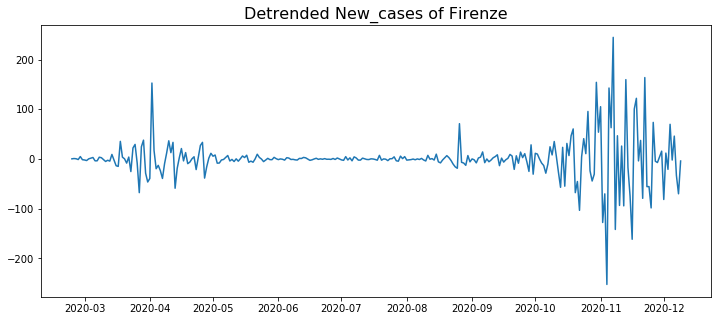

In [14]:
# Detrend by subtracting trend comp
plot_detrended_deseason(
    remove_trend(tmp_df, compart), 
    province,
    compart,
    "Detrended")

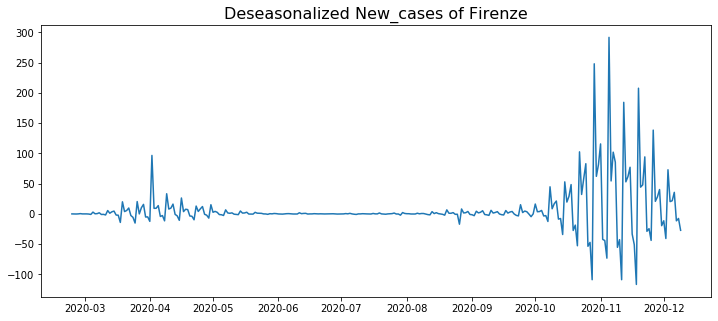

In [15]:
# Deseasonalize by subtracting trend
plot_detrended_deseason(
    deseason_trend(tmp_df, compart), 
    province,
    compart,
    "Deseasonalized")

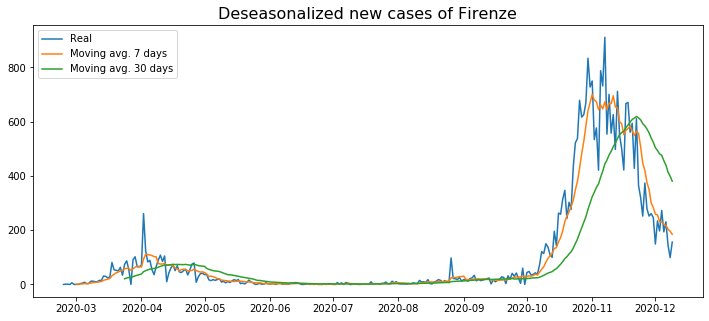

In [16]:
# Deseasonalize by taking mov. avg. with length = seasonal window
plot_deseason_ma(tmp_df, compart, province)

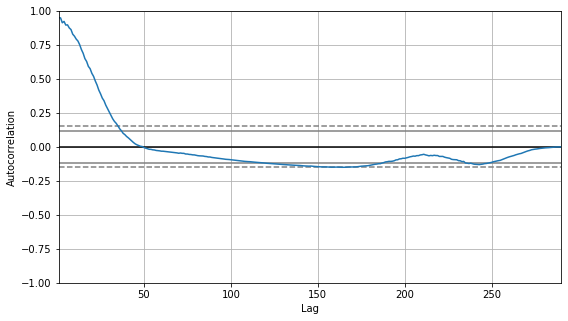

In [17]:
# Seasonality test
plot_autocorr(tmp_df, compart)

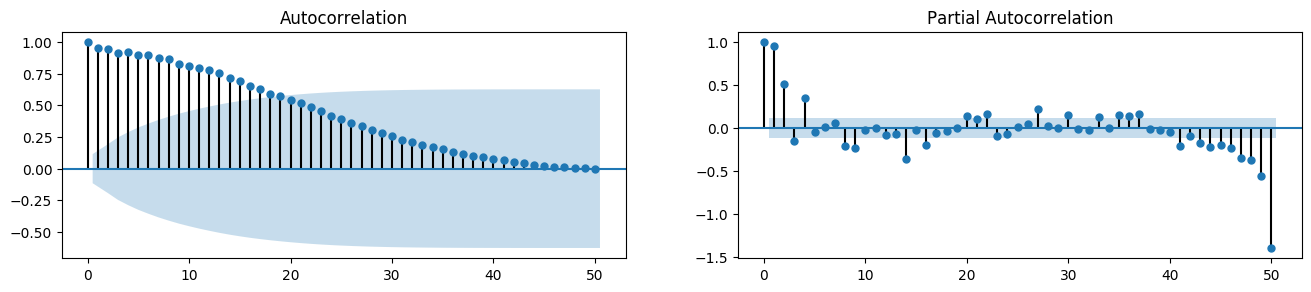

In [18]:
# Autocorrelation and partial autocorrelation
plot_acf_pacf(tmp_df, compart)

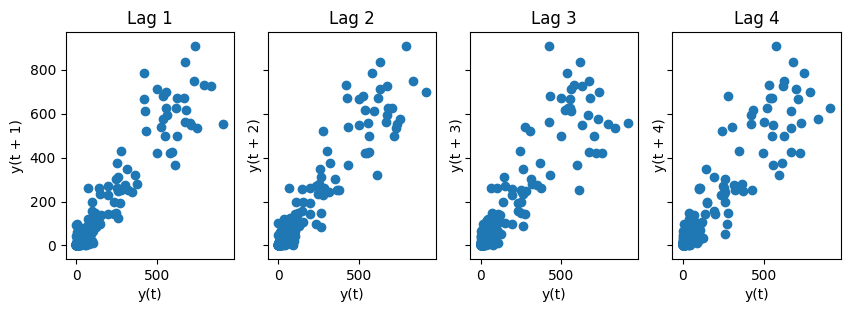

In [19]:
"""
Lag plots:
If points get wide and scattered with increasing lag, 
this means lesser correlation
"""

plot_lag_plots(tmp_df, compart)

In [20]:
# Estimate forecastability
print("SampEn:", SampEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values)))
print("ApproxEn:", ApEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values))) 

SampEn: 0.08969363102750517
ApproxEn: 0.24777649675081914


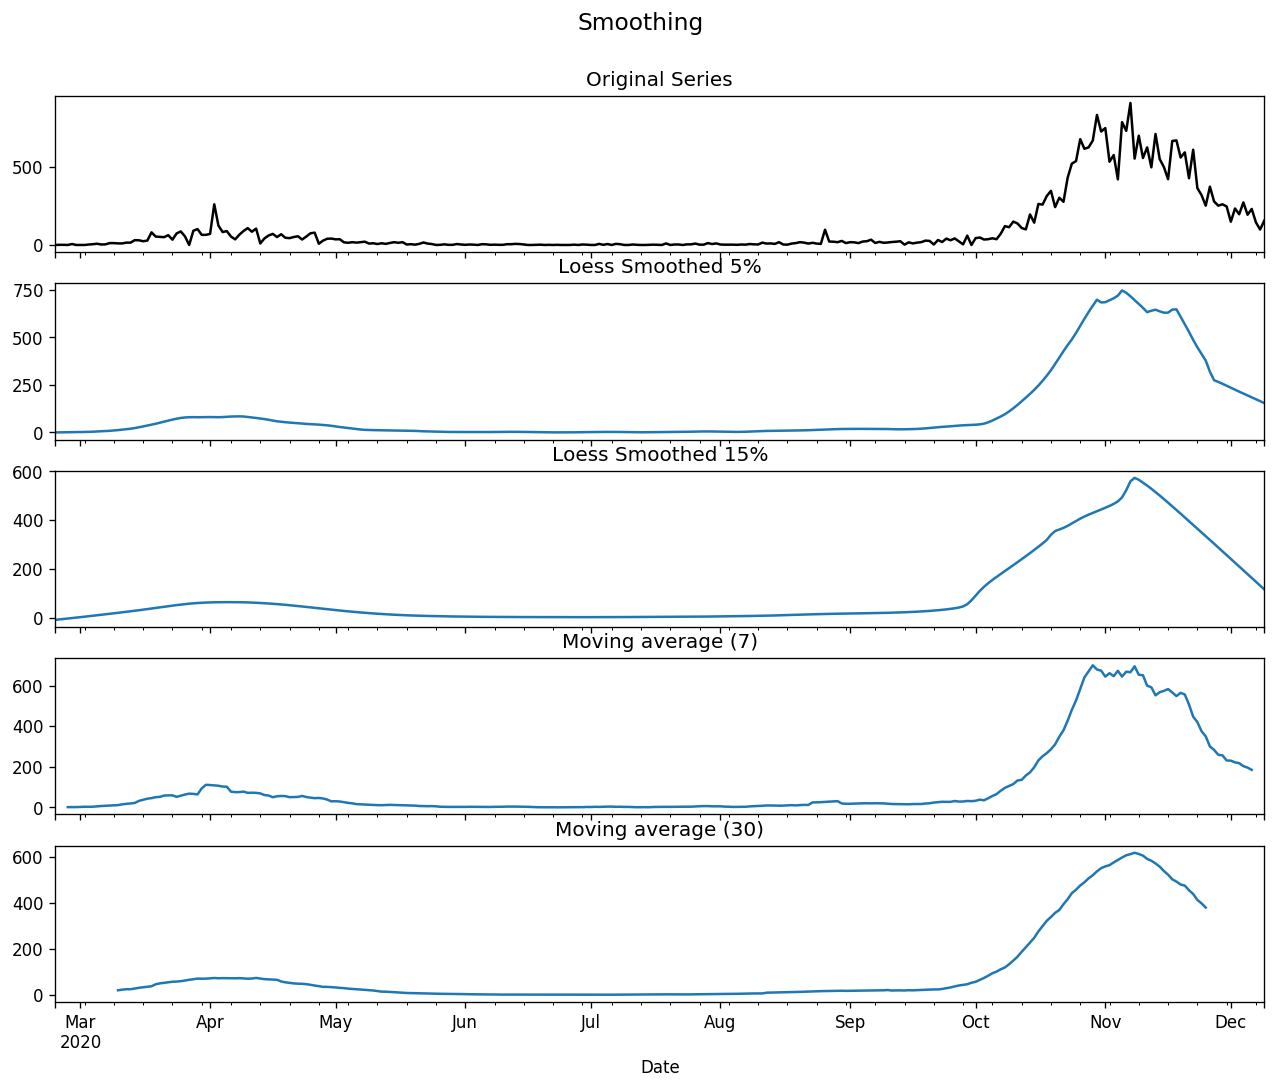

In [21]:
# Smoothing
plot_smoothing(tmp_df, compart)

In [22]:
"""
Granger causality tests:

Infected - Month
Infected - Deaths
"""

tmp_df = covidpro_df[covidpro_df.Province == province]

tmp_df['month'] = tmp_df[date].dt.month
gc_res = grangercausalitytests(tmp_df[[compart, 'month']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0126  , p=0.0837  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=3.0442  , p=0.0810  , df=1
likelihood ratio test: chi2=3.0282  , p=0.0818  , df=1
parameter F test:         F=3.0126  , p=0.0837  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3696  , p=0.6914  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=0.7522  , p=0.6865  , df=2
likelihood ratio test: chi2=0.7512  , p=0.6869  , df=2
parameter F test:         F=0.3696  , p=0.6914  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6856  , p=0.5615  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=2.1082  , p=0.5502  , df=3
likelihood ratio test: chi2=2.1005  , p=0.5518  , df=3
parameter F test:         F=0.6856  , p=0.5615  , df_denom=280, df_num=3


In [23]:
gc_res = grangercausalitytests(tmp_df[[compart, 'Deaths']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7995  , p=0.3720  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=0.8079  , p=0.3688  , df=1
likelihood ratio test: chi2=0.8067  , p=0.3691  , df=1
parameter F test:         F=0.7995  , p=0.3720  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5788  , p=0.0776  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=5.2488  , p=0.0725  , df=2
likelihood ratio test: chi2=5.2015  , p=0.0742  , df=2
parameter F test:         F=2.5788  , p=0.0776  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2330  , p=0.2980  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=3.7915  , p=0.2849  , df=3
likelihood ratio test: chi2=3.7666  , p=0.2878  , df=3
parameter F test:         F=1.2330  , p=0.2980  , df_denom=280, df_num=3


## Exploration TS: deaths Firenze

In [24]:
province = "Firenze"
compart = "Deaths"
date = 'Date'

In [25]:
tmp_df = covidpro_df[covidpro_df.Province == province]

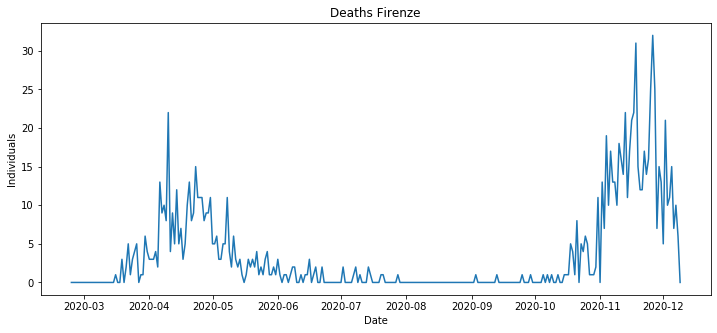

In [26]:
visualize_ts(tmp_df, date, compart, province)

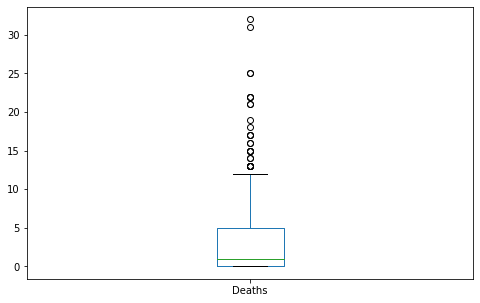

In [27]:
show_boxplot(tmp_df, compart)

In [28]:
tmp_df = tmp_df.set_index(date)

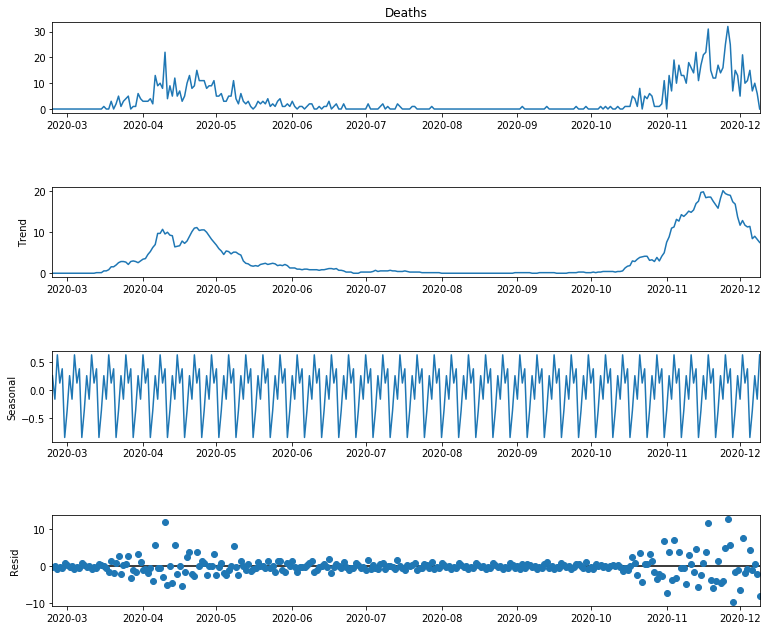

In [29]:
# Additive Decomposition
plot_decomposition(tmp_df, compart)

In [30]:
# Test for stationarity
adf_test(tmp_df[compart].values)

ADF Statistic: -2.7519413702967155
p-value: 0.06547326647232678
Critial Values:
   1%, -3.45453261164607
Critial Values:
   5%, -2.8721859575020017
Critial Values:
   10%, -2.572442854861866


In [31]:
# Test for trend stationarity
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.365743
p-value: 0.091921
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


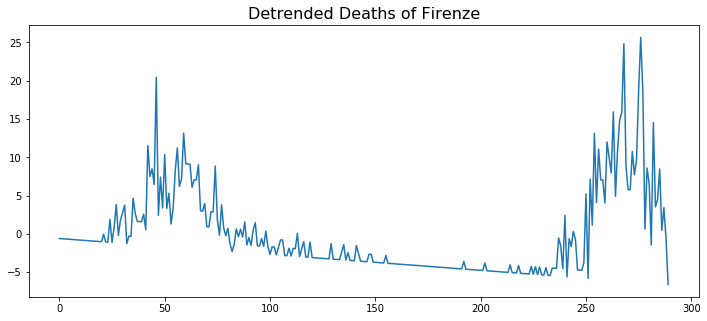

In [32]:
# Detrend by subtracting best leastsq fit
plot_detrended_deseason(
    signal.detrend(tmp_df[compart].values), 
    province,
    compart,
    "Detrended")

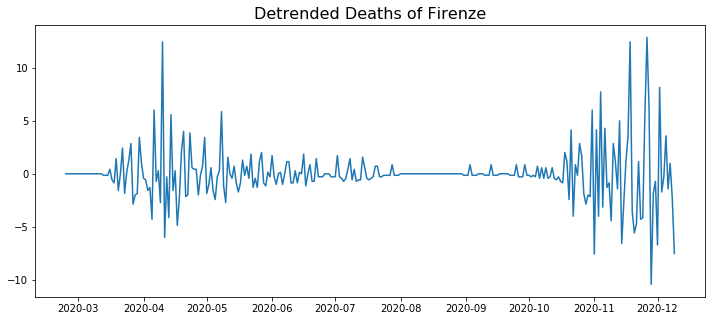

In [33]:
# Detrend by subtracting trend comp
plot_detrended_deseason(
    remove_trend(tmp_df, compart), 
    province,
    compart,
    "Detrended")

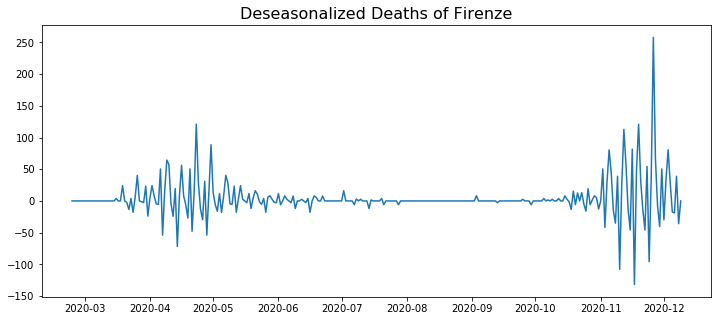

In [34]:
# Deseasonalize by subtracting trend
plot_detrended_deseason(
    deseason_trend(tmp_df, compart), 
    province,
    compart,
    "Deseasonalized")

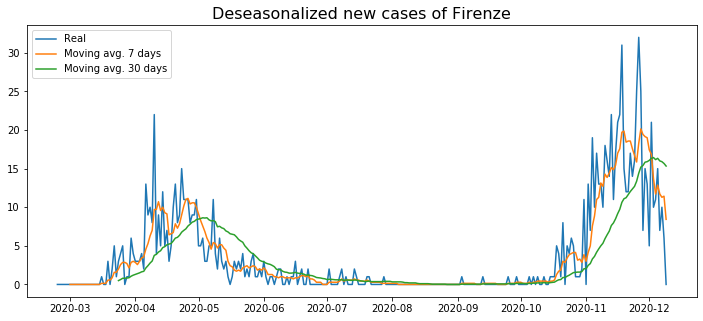

In [35]:
# Deseasonalize by taking mov. avg. with length = seasonal window
plot_deseason_ma(tmp_df, compart, province)

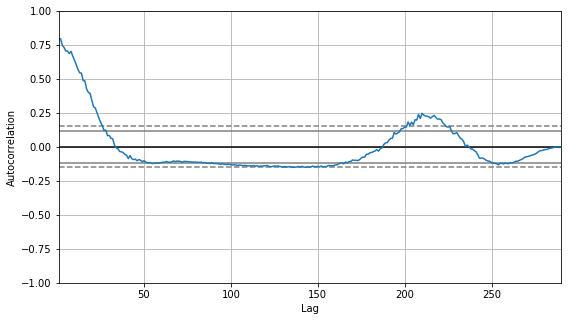

In [36]:
# Seasonality test
plot_autocorr(tmp_df, compart)

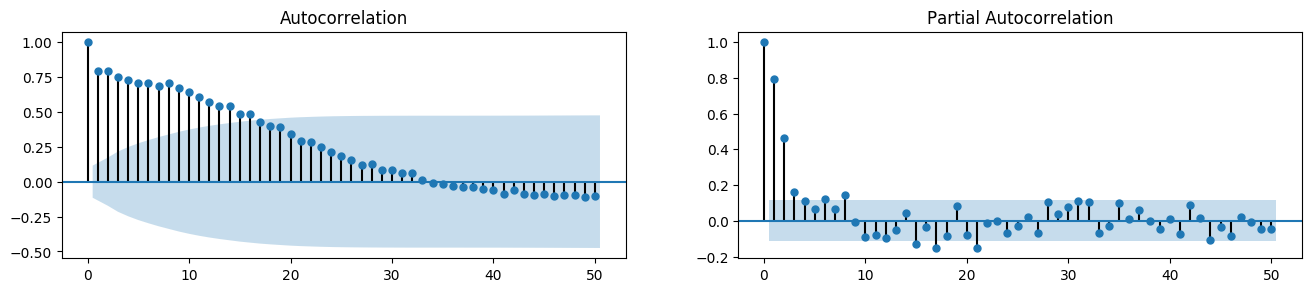

In [37]:
# Autocorrelation and partial autocorrelation
plot_acf_pacf(tmp_df, compart)

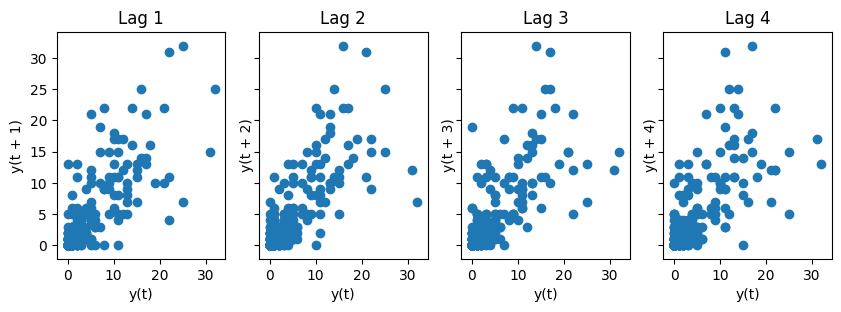

In [38]:
"""
Lag plots:
If points get wide and scattered with increasing lag, 
this means lesser correlation
"""

plot_lag_plots(tmp_df, compart)

In [39]:
# Estimate forecastability
print("SampEn:", SampEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values)))
print("ApproxEn:", ApEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values))) 

SampEn: 0.18732204802912877
ApproxEn: 0.47577134095104867


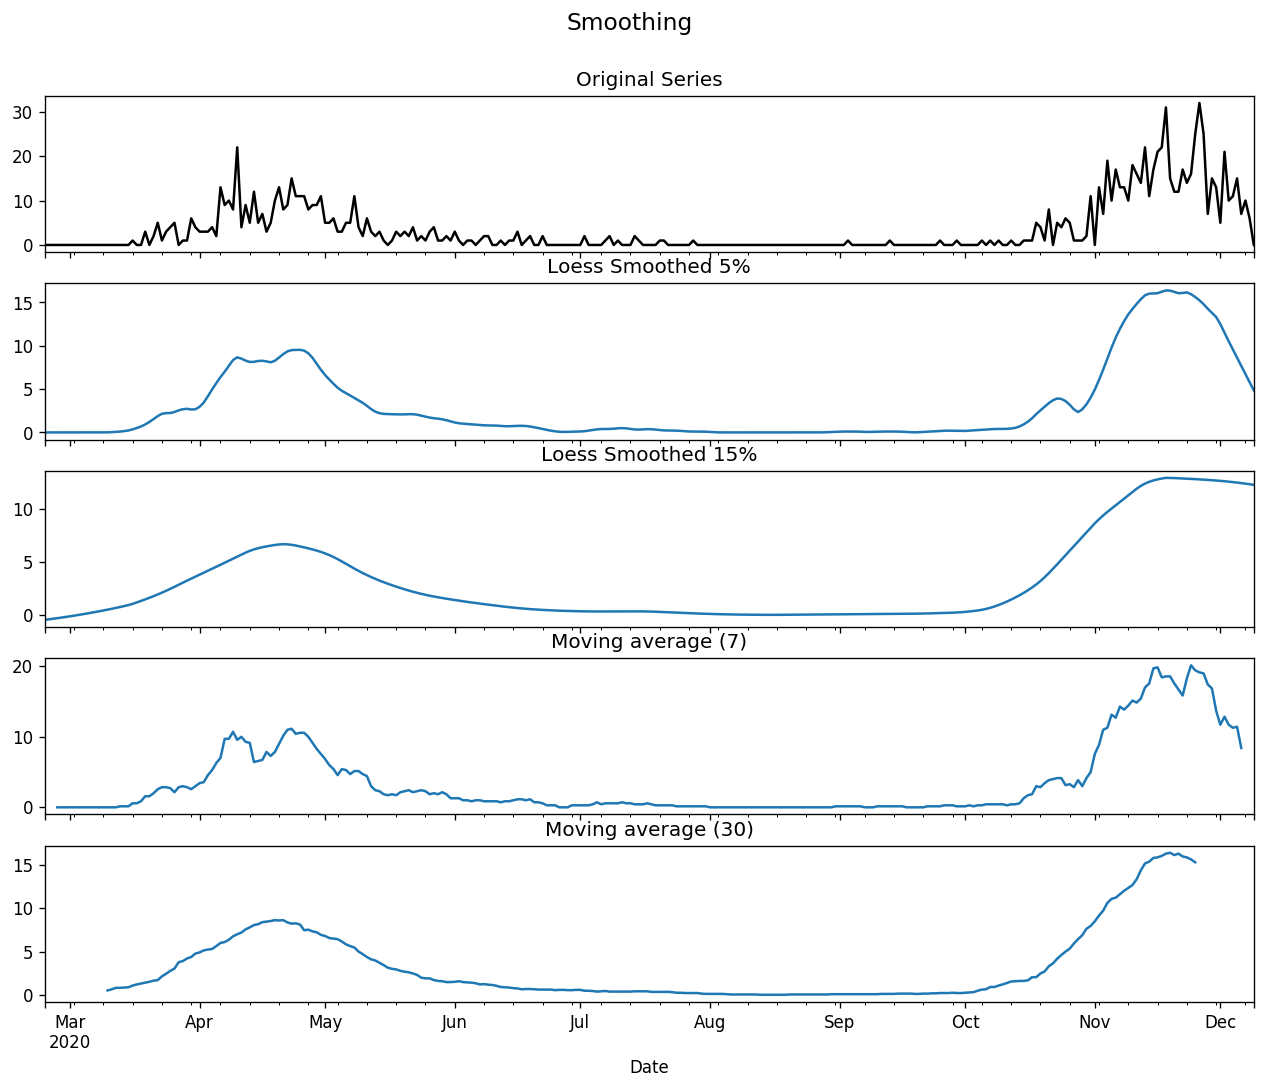

In [40]:
# Smoothing
plot_smoothing(tmp_df, compart)

In [41]:
"""
Granger causality tests:

Infected - Month
Infected - Deaths
"""

tmp_df = covidpro_df[covidpro_df.Province == province]

tmp_df['month'] = tmp_df[date].dt.month
gc_res = grangercausalitytests(tmp_df[[compart, 'month']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8913  , p=0.0901  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=2.9216  , p=0.0874  , df=1
likelihood ratio test: chi2=2.9069  , p=0.0882  , df=1
parameter F test:         F=2.8913  , p=0.0901  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6630  , p=0.1914  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=3.3847  , p=0.1841  , df=2
likelihood ratio test: chi2=3.3649  , p=0.1859  , df=2
parameter F test:         F=1.6630  , p=0.1914  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0205  , p=0.3840  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=3.1379  , p=0.3708  , df=3
likelihood ratio test: chi2=3.1209  , p=0.3734  , df=3
parameter F test:         F=1.0205  , p=0.3840  , df_denom=280, df_num=3


In [42]:
gc_res = grangercausalitytests(tmp_df[[compart, 'Deaths']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=485.5733, p=0.0000  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=339.8168, p=0.0000  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=283, df_num=3
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=232.1738, p=0.0000  , df_denom=283, df_num=3


## Exploration TS: infected Piemonte

In [43]:
province = "Piemonte"
compart = "nuovi_positivi"
date = 'data'

In [44]:
tmp_df = dpc_regioni_df[dpc_regioni_df.denominazione_regione == province]

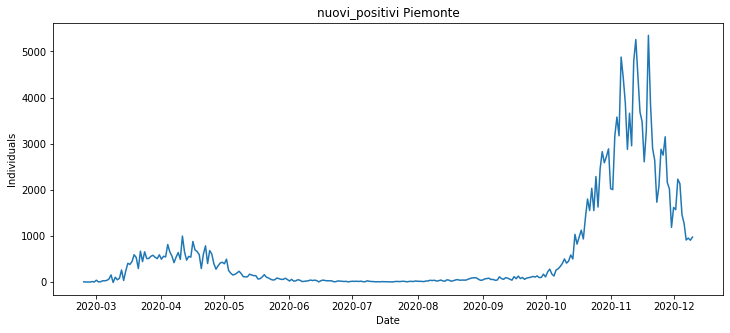

In [45]:
visualize_ts(tmp_df, date, compart, province)

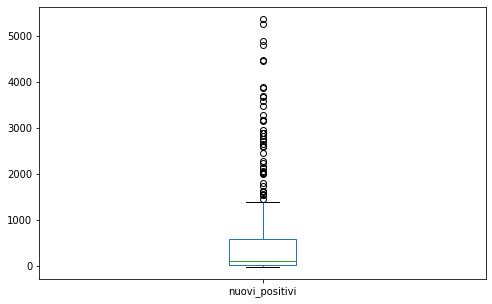

In [46]:
show_boxplot(tmp_df, compart)

In [47]:
tmp_df = tmp_df.set_index(date)

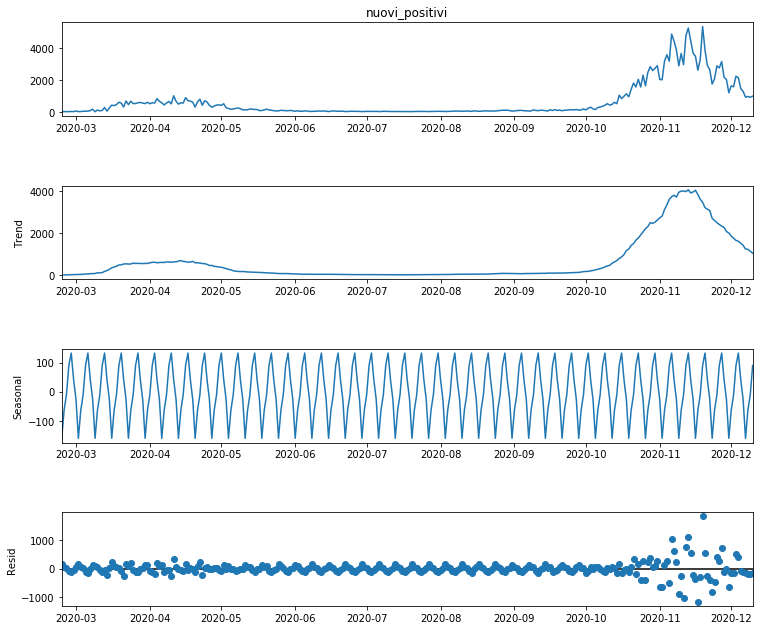

In [48]:
# Additive Decomposition
plot_decomposition(tmp_df, compart)

In [49]:
# Test for stationarity
adf_test(tmp_df[compart].values)

ADF Statistic: -3.3560158064650696
p-value: 0.012552855296211371
Critial Values:
   1%, -3.4540935579190495
Critial Values:
   5%, -2.8719934111688965
Critial Values:
   10%, -2.5723401594120388


In [50]:
# Test for trend stationarity
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.703087
p-value: 0.013265
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


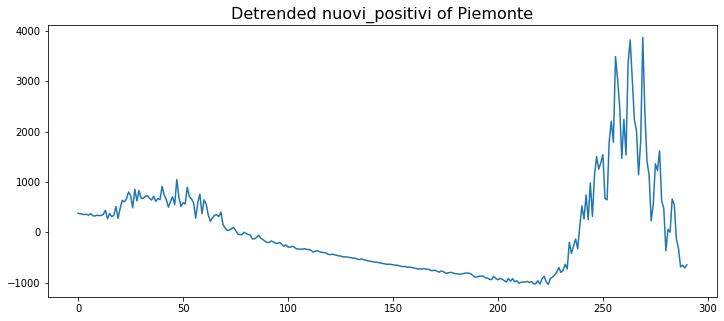

In [51]:
# Detrend by subtracting best leastsq fit
plot_detrended_deseason(
    signal.detrend(tmp_df[compart].values), 
    province,
    compart,
    "Detrended")

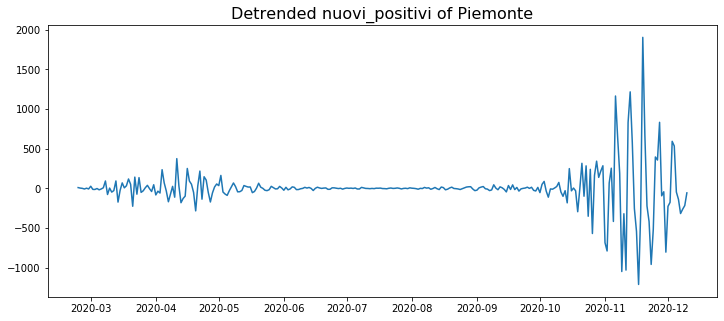

In [52]:
# Detrend by subtracting trend comp
plot_detrended_deseason(
    remove_trend(tmp_df, compart), 
    province,
    compart,
    "Detrended")

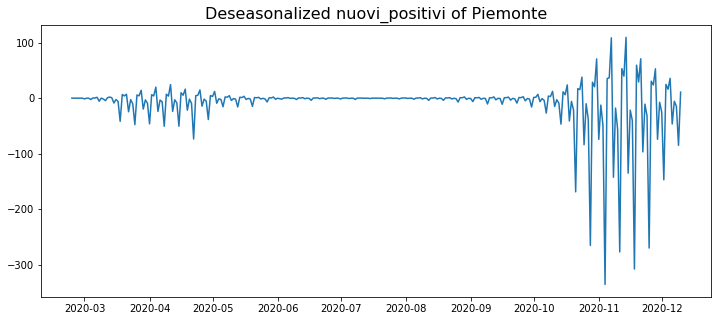

In [53]:
# Deseasonalize by subtracting trend
plot_detrended_deseason(
    deseason_trend(tmp_df, compart), 
    province,
    compart,
    "Deseasonalized")

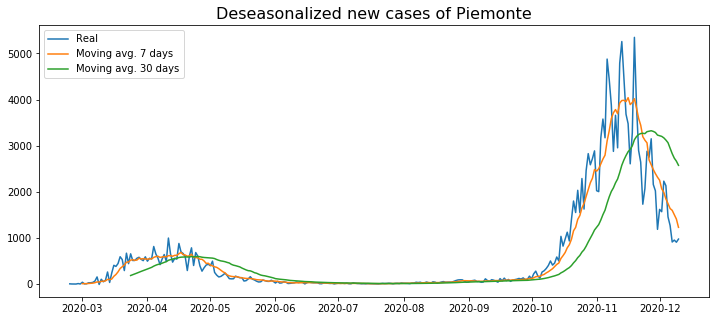

In [54]:
# Deseasonalize by taking mov. avg. with length = seasonal window
plot_deseason_ma(tmp_df, compart, province)

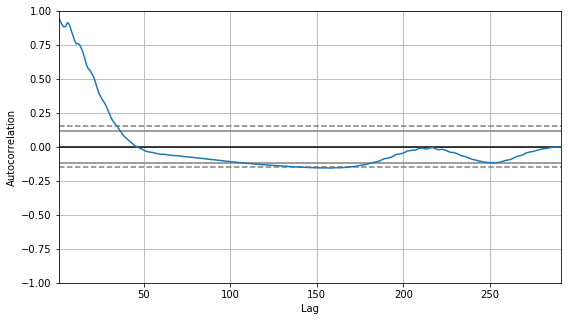

In [55]:
# Seasonality test
plot_autocorr(tmp_df, compart)

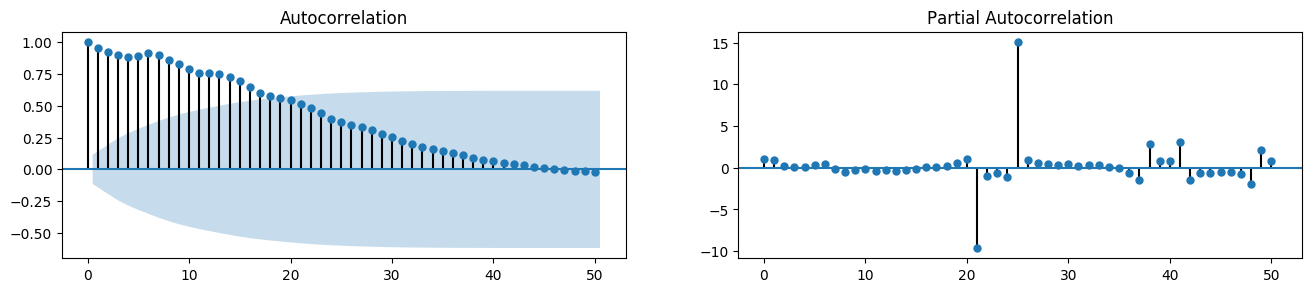

In [56]:
# Autocorrelation and partial autocorrelation
plot_acf_pacf(tmp_df, compart)

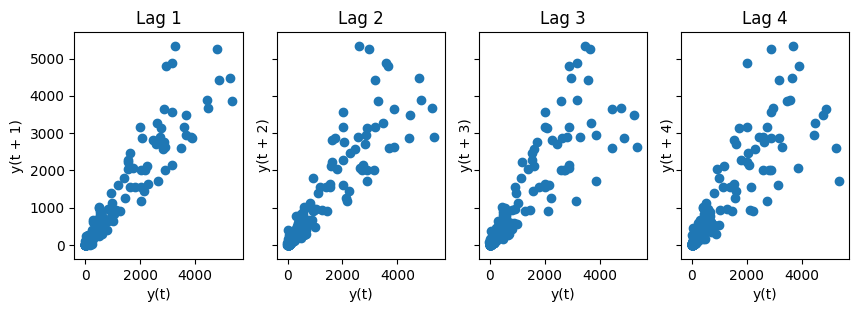

In [57]:
"""
Lag plots:
If points get wide and scattered with increasing lag, 
this means lesser correlation
"""

plot_lag_plots(tmp_df, compart)

In [58]:
# Estimate forecastability
print("SampEn:", SampEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values)))
print("ApproxEn:", ApEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values))) 

SampEn: 0.05778282138264353
ApproxEn: 0.22056687391795093


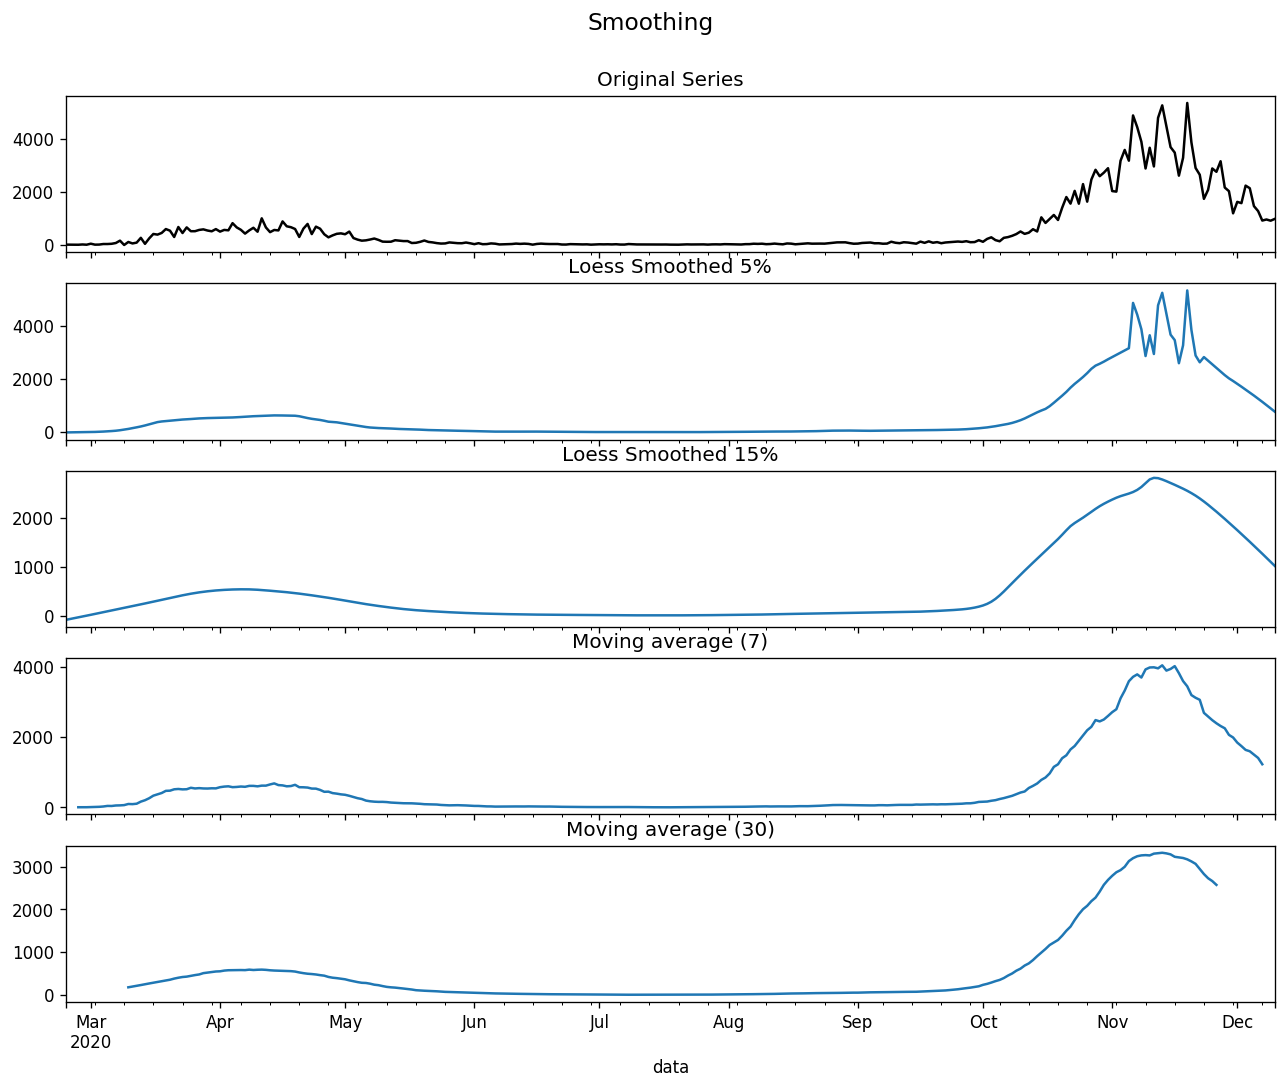

In [59]:
# Smoothing
plot_smoothing(tmp_df, compart)

In [60]:
"""
Granger causality tests:

Deaths - Month
Deaths - Infected
"""


tmp_df = dpc_regioni_df[dpc_regioni_df.denominazione_regione == province]

tmp_df['month'] = tmp_df[date].dt.month
gc_res = grangercausalitytests(tmp_df[[compart, 'month']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8526  , p=0.0923  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=2.8824  , p=0.0896  , df=1
likelihood ratio test: chi2=2.8682  , p=0.0903  , df=1
parameter F test:         F=2.8526  , p=0.0923  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0530  , p=0.3502  , df_denom=284, df_num=2
ssr based chi2 test:   chi2=2.1431  , p=0.3425  , df=2
likelihood ratio test: chi2=2.1352  , p=0.3438  , df=2
parameter F test:         F=1.0530  , p=0.3502  , df_denom=284, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2254  , p=0.3007  , df_denom=281, df_num=3
ssr based chi2 test:   chi2=3.7677  , p=0.2877  , df=3
likelihood ratio test: chi2=3.7433  , p=0.2906  , df=3
parameter F test:         F=1.2254  , p=0.3007  , df_denom=281, df_num=3


In [61]:
gc_res = grangercausalitytests(tmp_df[[compart, 'deceduti']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0547  , p=0.8152  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=0.0553  , p=0.8141  , df=1
likelihood ratio test: chi2=0.0553  , p=0.8141  , df=1
parameter F test:         F=0.0547  , p=0.8152  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9943  , df_denom=284, df_num=2
ssr based chi2 test:   chi2=0.0117  , p=0.9942  , df=2
likelihood ratio test: chi2=0.0117  , p=0.9942  , df=2
parameter F test:         F=0.0057  , p=0.9943  , df_denom=284, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0785  , p=0.9716  , df_denom=281, df_num=3
ssr based chi2 test:   chi2=0.2413  , p=0.9707  , df=3
likelihood ratio test: chi2=0.2412  , p=0.9707  , df=3
parameter F test:         F=0.0785  , p=0.9716  , df_denom=281, df_num=3


## Prediction

In [62]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province]
tmp_df = tmp_df.set_index(date)

In [59]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [64]:
def adv_ma_plot(df, compart, window, plot_intervals=False, scale=1.96, plot_anomalies=False, show_anomalies_label=False, legend_position='upper left'):
    rolling_mean = df[[compart]].rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    #plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    if plot_intervals:
        mae = mean_absolute_error(df[[compart]][window:], rolling_mean[window:])
        deviation = np.std(df[[compart]][window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")
        
        if plot_anomalies:
            
            anomalies = pd.DataFrame(index=df[[compart]].index, columns=df[[compart]].columns)
            anomalies[df[[compart]]<lower_bound] = df[[compart]][df[[compart]]<lower_bound]
            anomalies[df[[compart]]>upper_bound] = df[[compart]][df[[compart]]>upper_bound]
            plt.plot(anomalies, "ro", markersize=10)

            if show_anomalies_label:
                ymin, ymax = plt.ylim()
                plt.vlines(anomalies.dropna().index, ymin=ymin, ymax=ymax, linestyles='dashed', colors='grey')
                for x in anomalies.dropna().index:
                    plt.text(x, ymin + 20, x.strftime('%m-%d'), rotation=90, verticalalignment='center')
        
    plt.plot(df[[compart]][window:], label="Actual values")
    plt.legend(loc=legend_position)
    plt.show()

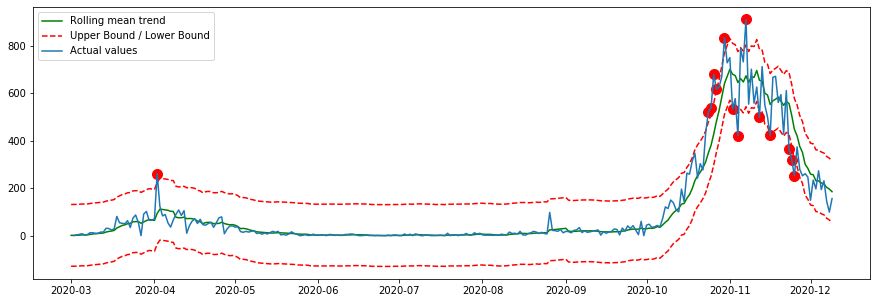

In [65]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True, plot_anomalies=True)

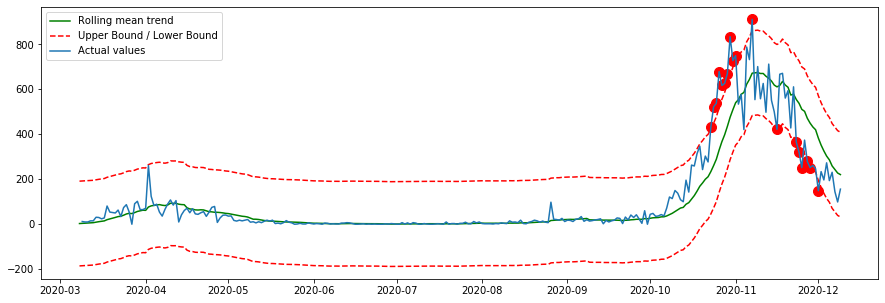

In [66]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True, plot_anomalies=True)

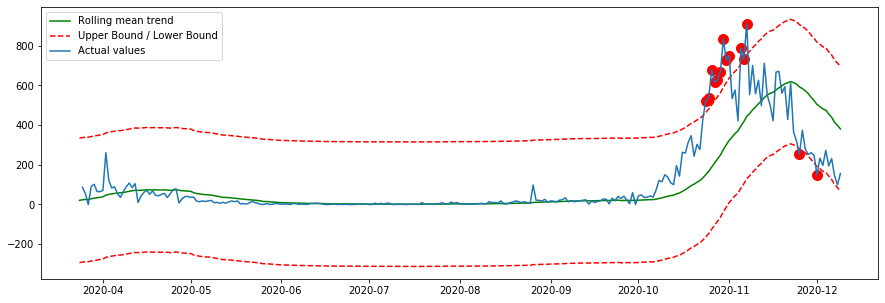

In [67]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True, plot_anomalies=True)

In [68]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query('20200701 > Date')
tmp_df = tmp_df.set_index(date)

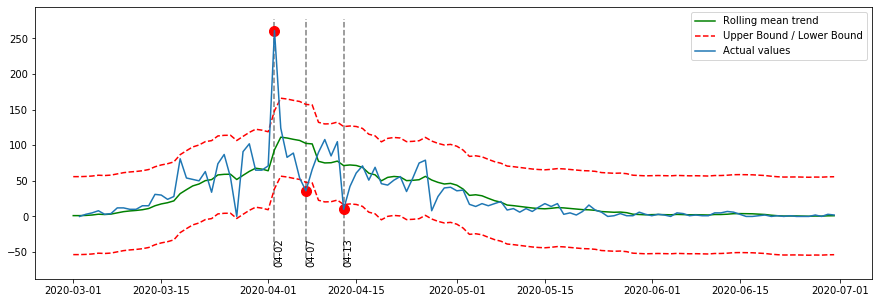

In [69]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

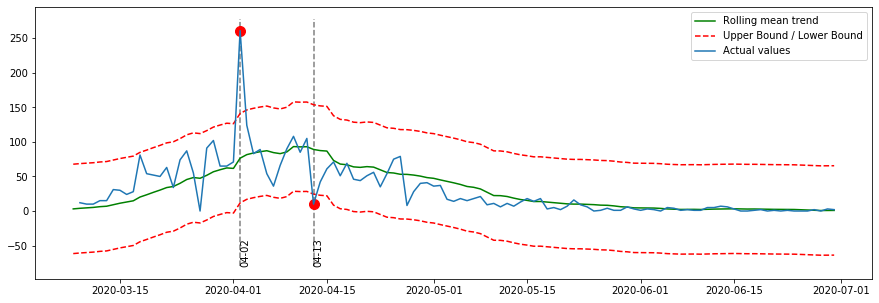

In [70]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

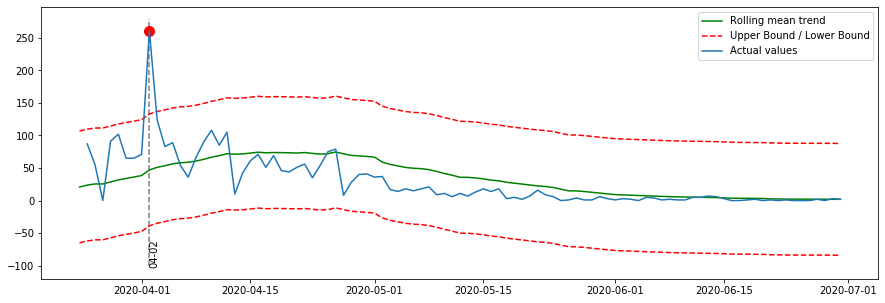

In [71]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

In [72]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query('20201208 > Date > 20200701')
tmp_df = tmp_df.set_index(date)

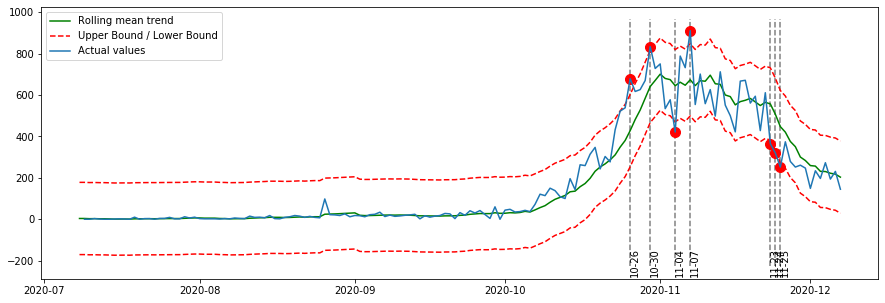

In [73]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper left')

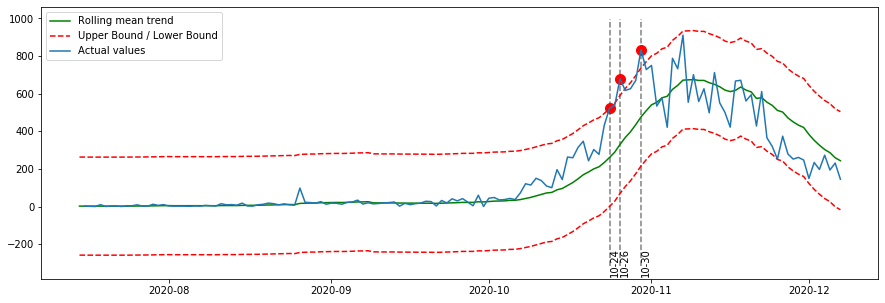

In [74]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper left')

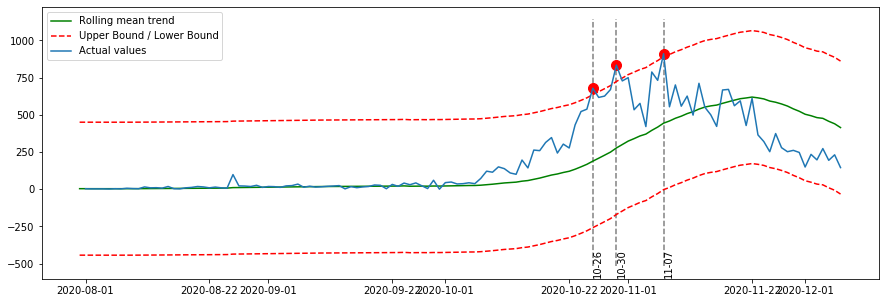

In [75]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper left')

In [6]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query('20200701 > Date')
tmp_df[compart] = tmp_df[compart].apply(lambda x: 0 if x is np.nan or x < 0 else x)
tmp_df = tmp_df.set_index(date)

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

train = tmp_df[[compart]].query('20200615 > Date')
test = tmp_df[[compart]].query('20200615 <= Date')

model = ExponentialSmoothing(train[compart].values)
model_fit = model.fit()

yhat = model_fit.predict(start=0,end=len(test)-1)

In [7]:
print("AIC:", model_fit.aic)
print("AICC:", model_fit.aicc)
print("BIC:", model_fit.bic)
print("k:", model_fit.k)
print("SSE:", model_fit.sse)
print("\n",model_fit.mle_retvals)

AIC: 734.9171873387718
AICC: 735.2910191144728
BIC: 740.354185081362
k: 2
SSE: 76461.69586868609

      fun: 76461.69586868609
     jac: array([-0.15625   ,  0.00195312])
 message: 'Optimization terminated successfully.'
    nfev: 26
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.28661053, 1.23024685])


In [8]:
model_fit.params_formatted

name     param  optimized
smoothing_level  alpha  0.286611       True
initial_level      l.0  1.230247       True

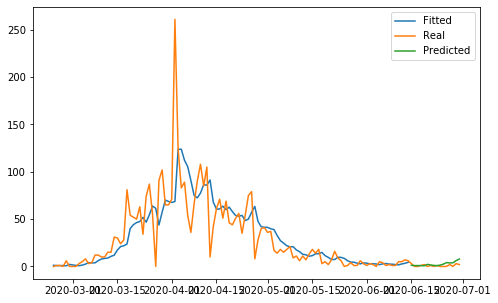

In [9]:
plt.figure(figsize=(8,5))
plt.plot(train.index, model_fit.fittedvalues, label='Fitted')
plt.plot(tmp_df.index, tmp_df[compart].values, label='Real')
plt.plot(test.index, yhat, label='Predicted')
plt.legend()
plt.show()

In [10]:
model = Holt(train[compart].values)

# It works with Powell or leastsq, but not with
# the default L-BFGS-B
model_fit = model.fit(method='Powell')

yhat = model_fit.predict(start=0,end=len(test)-1)

print("AIC:", model_fit.aic)
print("AICC:", model_fit.aicc)
print("BIC:", model_fit.bic)
print("k:", model_fit.k)
print("SSE:", model_fit.sse)
print("\n",model_fit.mle_retvals)

AIC: 734.0028984708081
AICC: 734.802898470808
BIC: 744.8768939559884
k: 4
SSE: 73179.28057596166

    direc: array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00801104, -0.01032161,  3.0526829 , -0.02933904],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [-0.00573726, -0.00850433,  1.01977364, -0.05749156]])
     fun: 73179.28057596166
 message: 'Optimization terminated successfully.'
    nfev: 757
     nit: 14
  status: 0
 success: True
       x: array([ 0.26281566, -0.05054052, 29.18917121, -0.1177391 ])


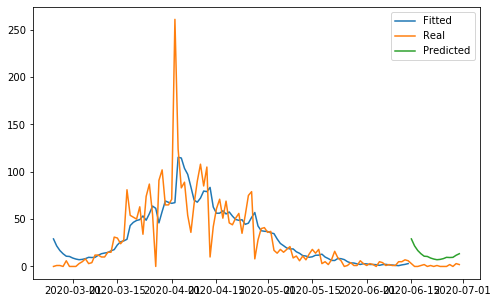

In [11]:
plt.figure(figsize=(8,5))
plt.plot(train.index, model_fit.fittedvalues, label='Fitted')
plt.plot(tmp_df.index, tmp_df[compart].values, label='Real')
plt.plot(test.index, yhat, label='Predicted')
plt.legend()
plt.show()

In [12]:
model_es = ExponentialSmoothing(train[compart].values)
model_fit_es = model_es.fit()

yhat_es = model_fit_es.predict(start=0,end=len(test)-1)

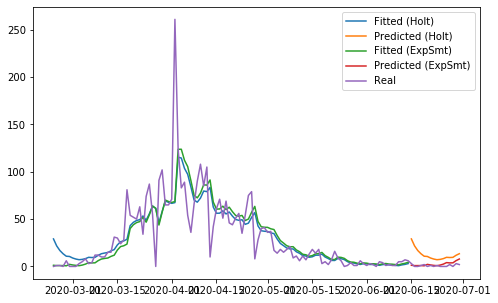

In [13]:
plt.figure(figsize=(8,5))
plt.plot(train.index, model_fit.fittedvalues, label='Fitted (Holt)')
plt.plot(test.index, yhat, label='Predicted (Holt)')
plt.plot(train.index, model_fit_es.fittedvalues, label='Fitted (ExpSmt)')
plt.plot(test.index, yhat_es, label='Predicted (ExpSmt)')
plt.plot(tmp_df.index, tmp_df[compart].values, label='Real')
plt.legend()
plt.show()

In [5]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

def tsplot(y, lags=50, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
        
    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

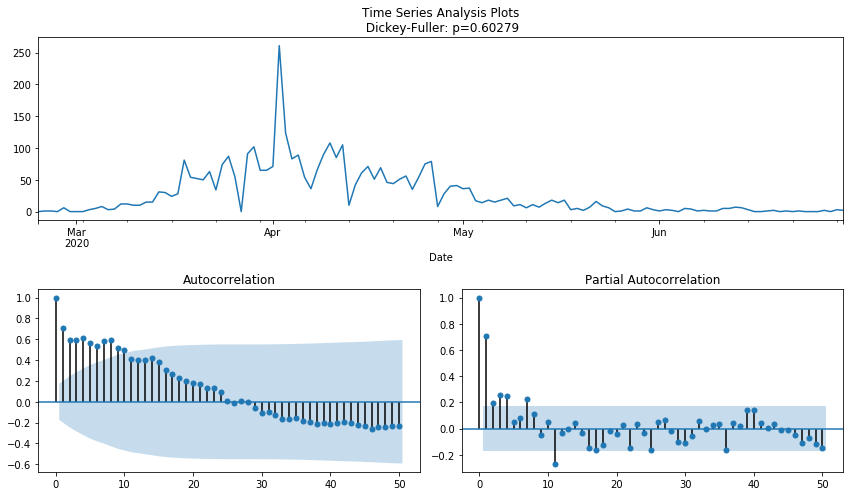

In [15]:
tsplot(tmp_df[compart], lags=50)

In [7]:
adf_test(tmp_df[compart].values)
kpss_test(tmp_df[compart].values)

ADF Statistic: -1.3568368277900387
p-value: 0.6027853897594708
Critial Values:
   1%, -3.487517288664615
Critial Values:
   5%, -2.8865777180380032
Critial Values:
   10%, -2.5801239192052012

KPSS Statistic: 0.378572
p-value: 0.086391
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


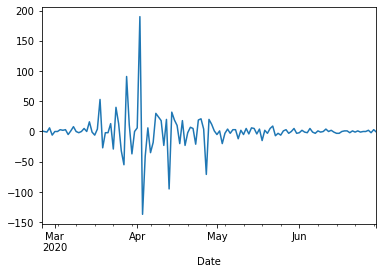

In [8]:
res = tmp_df[compart] - tmp_df[compart].shift(1)
res.dropna().plot()
plt.show()

In [9]:
adf_test(res.dropna().values)
kpss_test(res.dropna().values)

ADF Statistic: -3.6647367715015733
p-value: 0.004637408926120581
Critial Values:
   1%, -3.487517288664615
Critial Values:
   5%, -2.8865777180380032
Critial Values:
   10%, -2.5801239192052012

KPSS Statistic: 0.158872
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


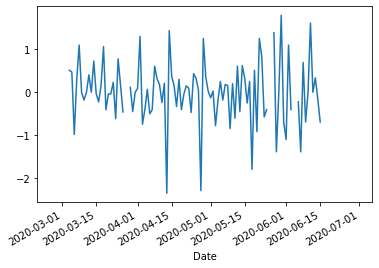

In [10]:
res = np.log(tmp_df[compart]) - np.log(tmp_df[compart]).shift(1)
res.dropna().plot()
plt.show()

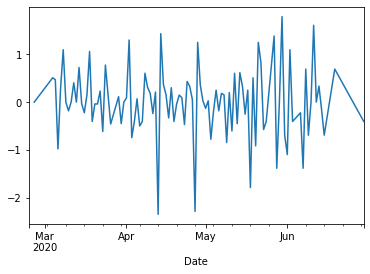

In [11]:
res_fix = res.replace([np.inf, -np.inf], np.nan).interpolate(method='time')
res_fix.plot()
plt.show()

In [12]:
# Shows that is stationary. Remember that KPSS null-hypo is opposite
# to ADF. We have to remove the trend and seasonality.
adf_test(res_fix.dropna().values)
kpss_test(res_fix.dropna().values)

ADF Statistic: -10.374148574924691
p-value: 2.224126550856314e-18
Critial Values:
   1%, -3.484219653271961
Critial Values:
   5%, -2.885145235641637
Critial Values:
   10%, -2.579359138917794

KPSS Statistic: 0.180195
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [13]:
res_fix.dropna(inplace=True)

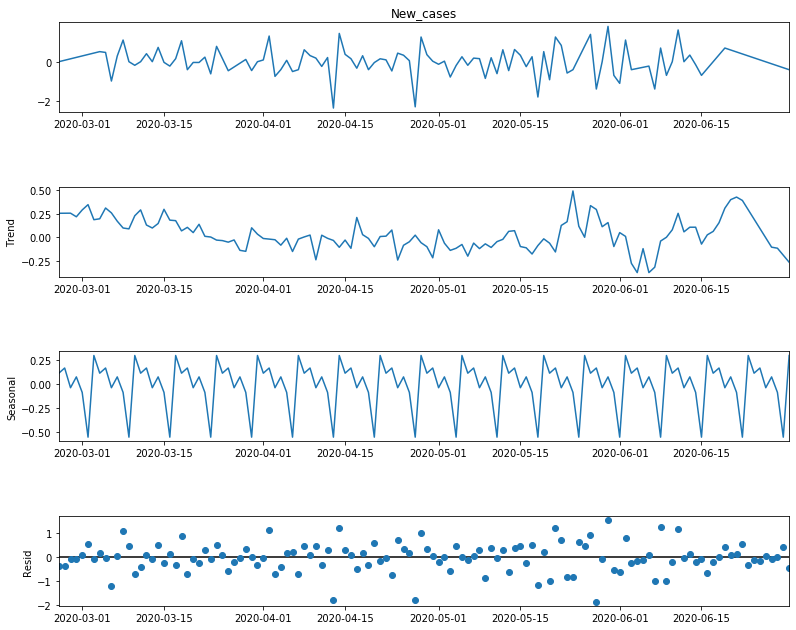

In [14]:
decomposed = seasonal_decompose(res_fix,model='additive',extrapolate_trend='freq')
plot_decomposition(result=decomposed)

In [15]:
detrended = res_fix - decomposed.trend
deseasonalized = detrended / decomposed.seasonal

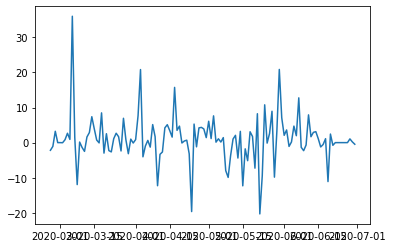

In [16]:
plt.plot(deseasonalized)
plt.show()

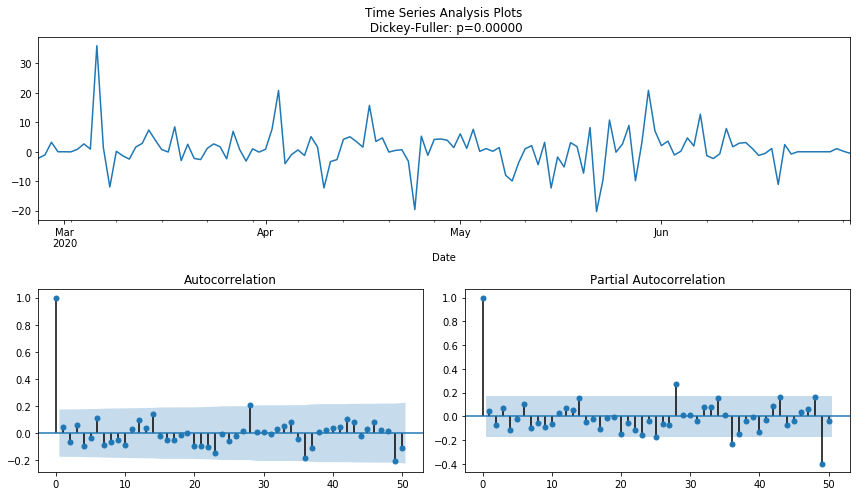

In [17]:
tsplot(deseasonalized, lags=50)

In [18]:
adf_test(deseasonalized.values)
kpss_test(deseasonalized.values)

ADF Statistic: -10.589650606104959
p-value: 6.578190158075751e-19
Critial Values:
   1%, -3.4837793736959997
Critial Values:
   5%, -2.88495387648
Critial Values:
   10%, -2.579256976

KPSS Statistic: 0.138756
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [19]:
# setting initial values and some bounds for them
from itertools import product

ps = list(range(2, 5)) + [28]
d=1 
qs = list(range(2, 5)) + [28]
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 7 # season length is 7

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

64

In [29]:
from tqdm import tqdm

def optimizeSARIMA(data, parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
result_table = optimizeSARIMA(deseasonalized, parameters_list, d, D, s)

100%|██████████| 64/64 [07:31<00:00,  7.05s/it]


In [75]:
warnings.filterwarnings('default')

In [39]:
result_table.head()

parameters         aic
0  (2, 3, 1, 1)  817.105015
1  (2, 2, 1, 1)  817.170147
2  (2, 4, 1, 1)  818.543111
3  (3, 2, 1, 1)  818.644448
4  (3, 3, 1, 1)  818.823863

In [20]:
#p, q, P, Q = result_table.parameters[0]
p, q, P, Q = (2, 3, 1, 1)

best_results = sm.tsa.statespace.SARIMAX(deseasonalized, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_results.summary())

/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  126
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 7)   Log Likelihood                -400.553
Date:                             Fri, 11 Dec 2020   AIC                            817.105
Time:                                     16:11:14   BIC                            839.270
Sample:                                 02-26-2020   HQIC                           826.

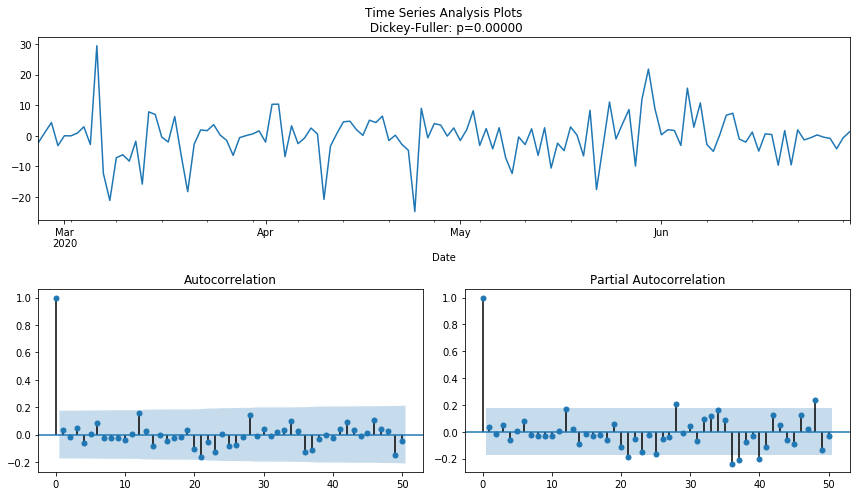

In [21]:
tsplot(best_results.resid, lags=50)

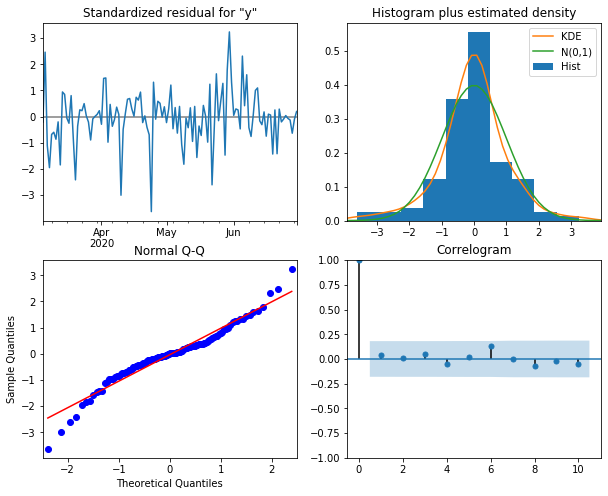

In [22]:
best_results.plot_diagnostics(figsize=(10,8))
plt.show()

In [23]:
best_results.conf_int()

0           1
ar.L1     -1.711645   -1.336380
ar.L2     -1.059836   -0.757594
ma.L1    -13.921534   15.160256
ma.L2    -24.346197   23.082654
ma.L3    -15.566891   13.592808
ar.S.L7   -0.411464   -0.090980
ma.S.L7   -0.829505   -0.518677
sigma2  -604.528511  692.848032

In [24]:
print("MAE:", best_results.mae)
print("MSE:", best_results.mse)
print("SSE:", best_results.sse)

MAE: 4.981802952314746
MSE: 54.63265256729769
SSE: 6883.714223479509


In [25]:
def plotSARIMA(y_train, y_test, model, s, d):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    fitted = model.fittedvalues[s+d:].copy()
    real = y_train[s+d:].copy()

    real_plus_test = pd.concat([real, y_test])
    forecast = model.predict(start=real.index[-1], end=real_plus_test.index[-1])
    fitted_plus_prediction = pd.concat([fitted, forecast])

    plt.figure(figsize=(15, 7))
    plt.plot(fitted_plus_prediction, label="model")
    plt.axvspan(fitted.index[-1], fitted_plus_prediction.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(real_plus_test, label="actual")
    plt.legend(loc='upper right')
    plt.show()

In [26]:
test_df = covidpro_df[covidpro_df.Province == province].query('20200715 > Date >= 20200701')
test_df[compart] = test_df[compart].apply(lambda x: 0 if x is np.nan or x < 0 else x)
test_df = test_df.set_index(date)

test_df = test_df[[compart]]

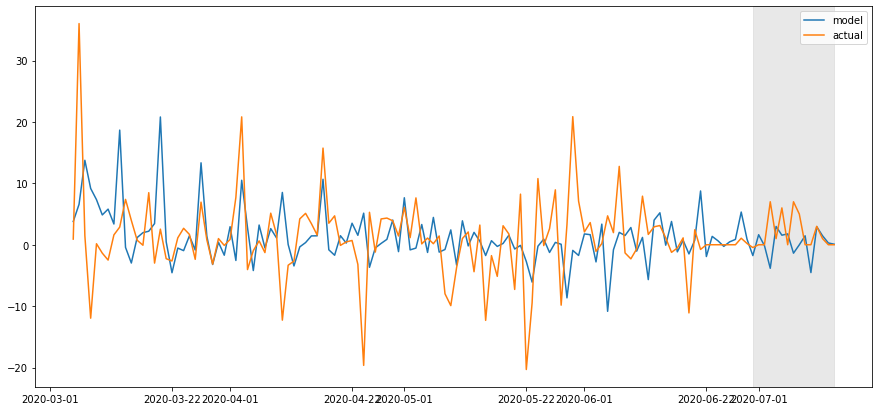

In [27]:
plotSARIMA(deseasonalized, test_df[[compart]][compart], best_results, s, d)

In [71]:
tmp_df = covidpro_df[covidpro_df.Province == province].query('20200801 > Date')
tmp_df[compart] = tmp_df[compart].apply(lambda x: 0 if x is np.nan or x < 0 else x)
tmp_df = tmp_df.set_index(date)

tmp_df = tmp_df[[compart]]

In [72]:
data = pd.DataFrame(tmp_df[compart].copy())

In [73]:
data.columns = ["y"]
data["weekday"] = data.index.weekday

In [74]:
for i in range(1, 30):
    data["lag_{}".format(i)] = data.y.shift(i)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [76]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [77]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bound / lower bound", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_squared_error(prediction, y_test)
    plt.title("Mean squared error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')
    plt.show()

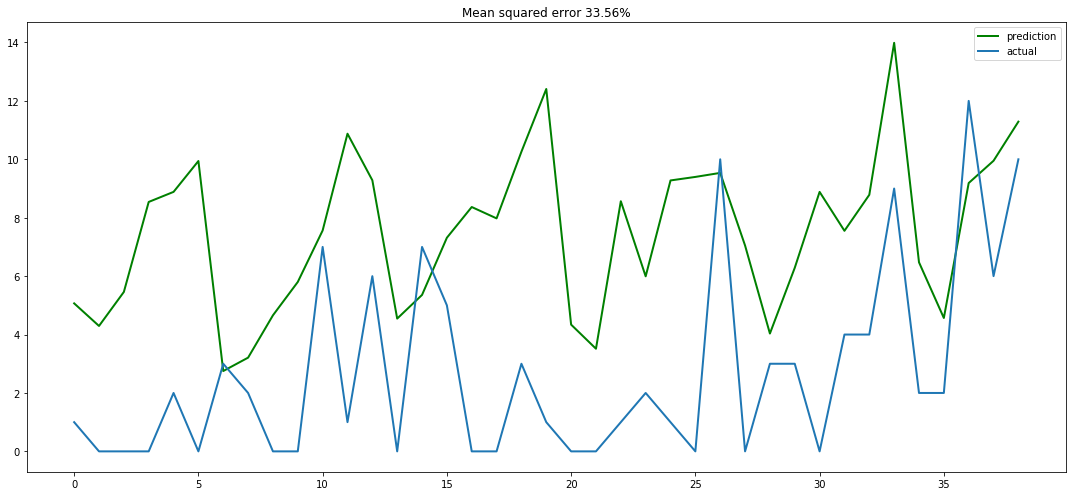

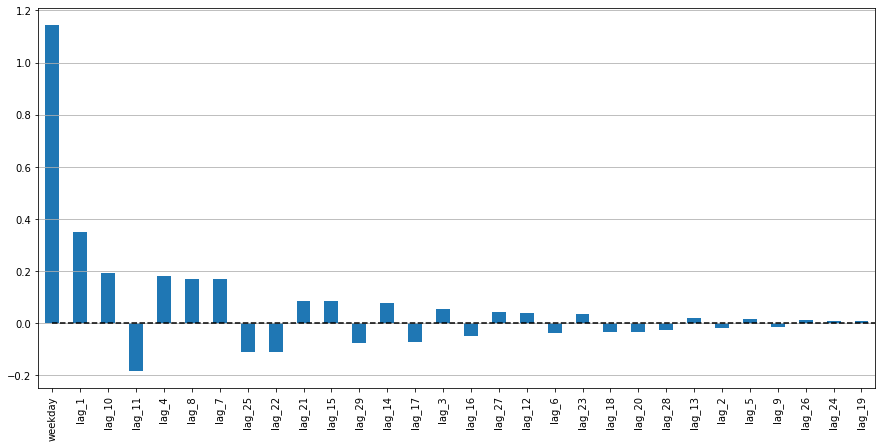

In [82]:
plotModelResults(lr)
plotCoefficients(lr)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

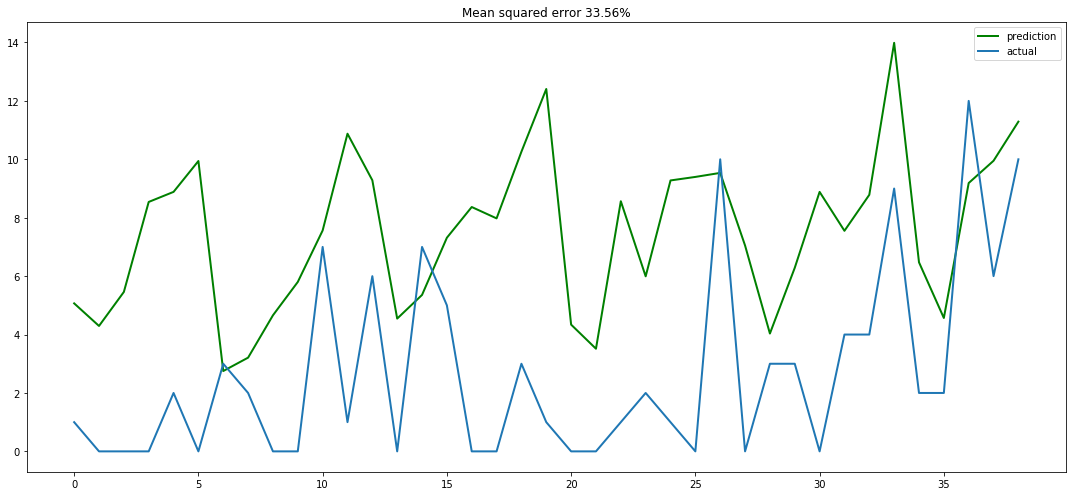

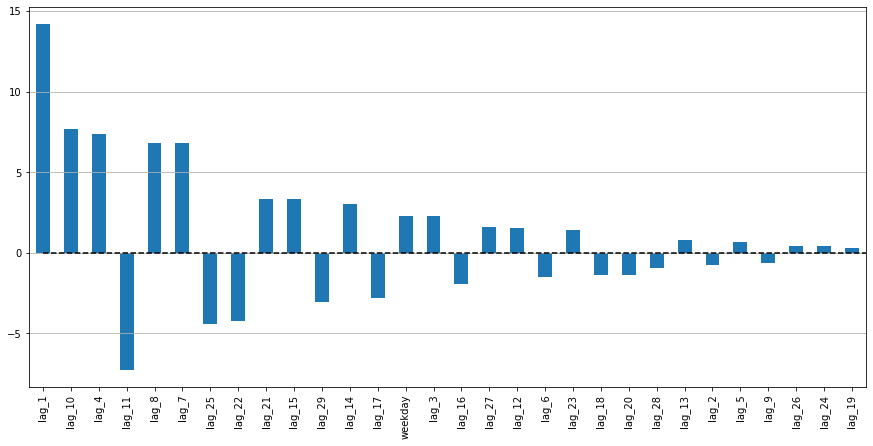

In [84]:
y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled)
plotCoefficients(lr)

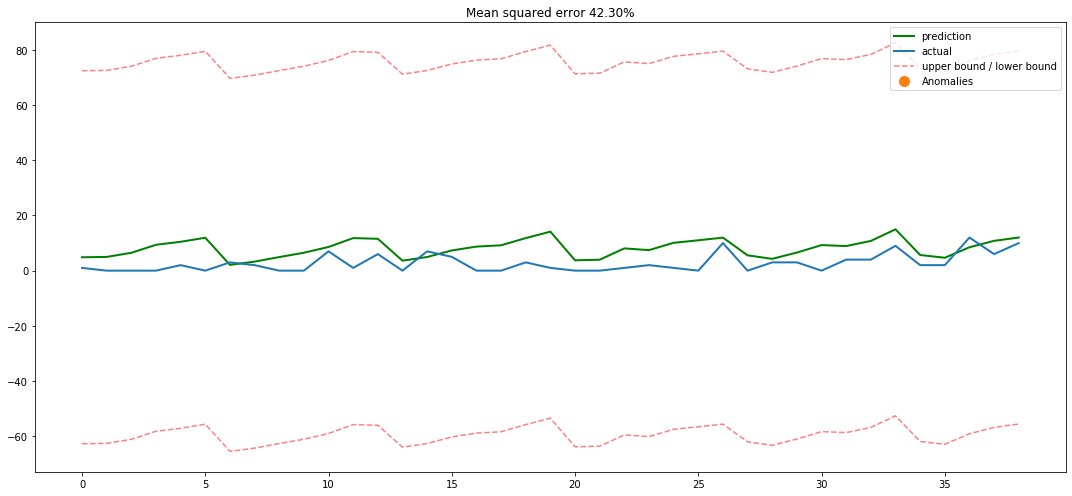

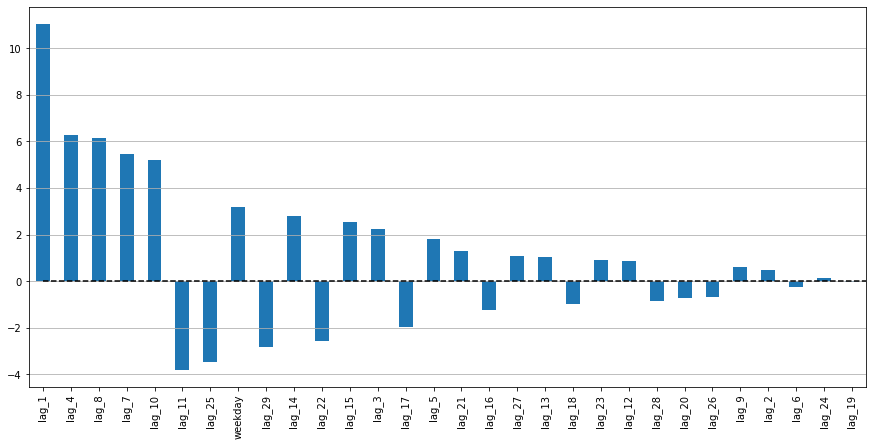

In [85]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

In [88]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

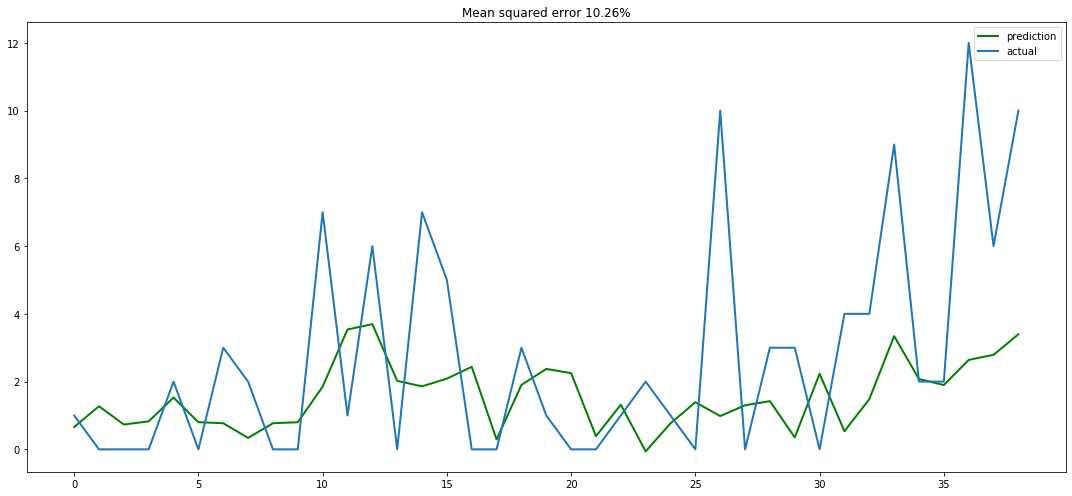

In [90]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled)